In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import json
import pickle

In [2]:
df = pd.read_csv('data/train.csv')
df.shape

(1628, 29)

In [3]:
df.columns

Index(['Id', 'Age', 'Attrition', 'BusinessTravel', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'CommunicationSkill',
       'Behaviour'],
      dtype='object')

### Feature Engineering

In [4]:
def extract_feature(df_input):
    df = df_input.copy()
    df['OwnStocks'] = df.StockOptionLevel.apply(lambda x: 0 if x == 0 else 1)
    df['PropWorkLife'] = df.TotalWorkingYears / df.Age
    df['PropExpComp'] = df.TotalWorkingYears / (df.NumCompaniesWorked+1)
    cols_to_drop = [
                    'Id',
                    'Behaviour',
                    'PerformanceRating',
                    'Gender',
                    'Education', 
                    'Department',
                    'EmployeeNumber',
                    'PercentSalaryHike',
                    'YearsInCurrentRole',
                    'YearsSinceLastPromotion',
                    'YearsWithCurrManager',
                    'JobInvolvement',
                    'EducationField',
                    'YearsAtCompany',
                    'Age',
                    'StockOptionLevel',
                    'TotalWorkingYears',
                    'NumCompaniesWorked',
                    'MonthlyIncome'
                  ]
    df.drop(cols_to_drop, inplace = True, axis = 1)
    print('Columns Dropped : {}'.format(cols_to_drop))
    print('Columns in DataFrame: {}'.format(df.columns.to_list()))
    return df

In [5]:
df_cleaned = extract_feature(df)

Columns Dropped : ['Id', 'Behaviour', 'PerformanceRating', 'Gender', 'Education', 'Department', 'EmployeeNumber', 'PercentSalaryHike', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'JobInvolvement', 'EducationField', 'YearsAtCompany', 'Age', 'StockOptionLevel', 'TotalWorkingYears', 'NumCompaniesWorked', 'MonthlyIncome']
Columns in DataFrame: ['Attrition', 'BusinessTravel', 'DistanceFromHome', 'EnvironmentSatisfaction', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'OverTime', 'TrainingTimesLastYear', 'CommunicationSkill', 'OwnStocks', 'PropWorkLife', 'PropExpComp']


### Preprocessing and Model Building Init

In [6]:
df_cleaned.drop_duplicates(inplace=True)
df_cleaned.shape

(1000, 13)

In [7]:
df_X = df_cleaned.drop(['Attrition'], axis = 1).copy()
df_y = df_cleaned[['Attrition']].copy()

In [8]:
object_type = df_X.select_dtypes(include='object').columns
object_type

numerical_type = df_X.select_dtypes(exclude='object').columns
numerical_type

cat_cols = []
for c in object_type:
    cat_cols.append(df_X.columns.to_list().index(c))
    
cat_cols

[0, 3, 5, 6]

In [9]:
df_X.head()

,BusinessTravel,DistanceFromHome,EnvironmentSatisfaction,JobRole,JobSatisfaction,MaritalStatus,OverTime,TrainingTimesLastYear,CommunicationSkill,OwnStocks,PropWorkLife,PropExpComp
0,Non-Travel,2,3,Laboratory Technician,4,Single,No,2,4,0,0.400000,12.00
1,Travel_Rarely,12,3,Manufacturing Director,3,Married,Yes,2,2,1,0.194444,0.70
2,Travel_Rarely,2,3,Sales Executive,4,Single,No,3,5,0,0.218182,2.40
3,Travel_Rarely,24,1,Research Scientist,4,Single,No,2,4,0,0.461538,2.25
4,Travel_Rarely,3,3,Manufacturing Director,3,Married,No,2,1,1,0.270270,5.00


In [10]:
df_X.dtypes

BusinessTravel              object
DistanceFromHome             int64
EnvironmentSatisfaction      int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
OverTime                    object
TrainingTimesLastYear        int64
CommunicationSkill           int64
OwnStocks                    int64
PropWorkLife               float64
PropExpComp                float64
dtype: object

In [12]:
df_X_cat = pd.get_dummies(df_X.iloc[:,cat_cols], drop_first=True)
df_X_num = df_X.loc[:, numerical_type]
df_X_final = pd.concat((df_X_num, df_X_cat), axis= 1)

In [13]:
df_X_final.columns

Index(['DistanceFromHome', 'EnvironmentSatisfaction', 'JobSatisfaction',
       'TrainingTimesLastYear', 'CommunicationSkill', 'OwnStocks',
       'PropWorkLife', 'PropExpComp', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'JobRole_Human Resources',
       'JobRole_Laboratory Technician', 'JobRole_Manager',
       'JobRole_Manufacturing Director', 'JobRole_Research Director',
       'JobRole_Research Scientist', 'JobRole_Sales Executive',
       'JobRole_Sales Representative', 'MaritalStatus_Married',
       'MaritalStatus_Single', 'OverTime_Yes'],
      dtype='object')

In [14]:
final_cols = df_X_final.columns.values

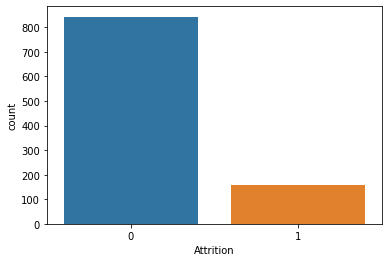

In [15]:
sns.countplot(df_y.Attrition)

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler
#df_X_final = df_X_final.values
#df_y = df_y.values
X_train,X_test,y_train,y_test = train_test_split(df_X_final, df_y, test_size=0.15, random_state = 0, stratify=df_y)

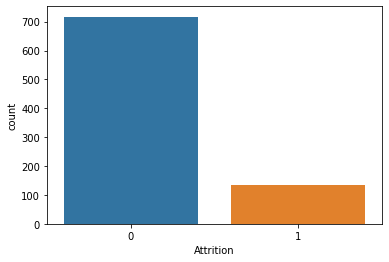

In [17]:
sns.countplot(y_train.Attrition)

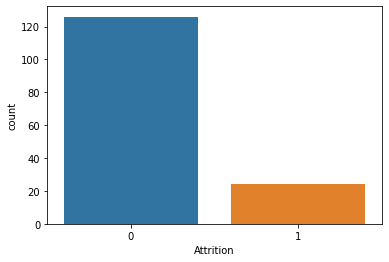

In [18]:
sns.countplot(y_test.Attrition)

In [19]:
X_train,X_test,y_train,y_test = X_train.values,X_test.values,y_train.values,y_test.values

In [20]:
from imblearn.over_sampling import SMOTE, ADASYN, SVMSMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTETomek

Using TensorFlow backend.


In [21]:
#sampler1 = SMOTE(sampling_strategy= 0.7)
sampler1 = RandomOverSampler(sampling_strategy=0.4)
#sampler1 = SVMSMOTE(sampling_strategy= 0.8)
#sampler2 = ADASYN()
#sampler2 = RandomUnderSampler(sampling_strategy=0.8)

#X_train, y_train = oversampler_1.fit_resample(X_train, y_train)
X_train, y_train = sampler1.fit_resample(X_train, y_train)

sampler = SMOTETomek(sampling_strategy=0.9)
X_train, y_train = sampler.fit_resample(X_train, y_train)

In [22]:
y_train, y_test = y_train.ravel(), y_test.ravel()

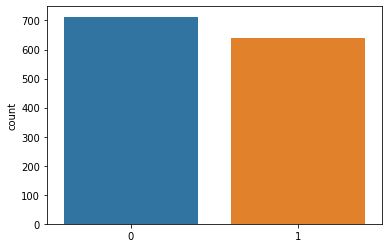

In [23]:
sns.countplot(y_train)

In [24]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

### Building A few Models with CV

In [25]:
cv = RepeatedStratifiedKFold(n_splits= 5, n_repeats=3, random_state=1)

In [27]:
gsc = GridSearchCV(
        estimator=RandomForestClassifier(),
        param_grid={
            'n_estimators': [50,70,100,200,300,400,500,1000],
            'max_features': ['log2','auto','None',0.4,0.5,0.7,0.8],
            'oob_score': [True, False]
        },
        cv=cv, scoring='roc_auc', verbose=0, n_jobs=-1)

grid_result = gsc.fit(X_train, y_train)
print(grid_result.best_params_)
print(grid_result.best_score_)

{'max_features': 'auto', 'n_estimators': 300, 'oob_score': False}
0.9870158877197295


In [28]:
gsc = GridSearchCV(
        estimator=DecisionTreeClassifier(),
        param_grid={
            'criterion': ['gini','entropy'],
            'splitter': ['best','random'],
            'max_features': ['log2','auto','None']
        },
        cv=cv, scoring='roc_auc', verbose=0, n_jobs=-1)

grid_result = gsc.fit(X_train, y_train)
print(grid_result.best_params_)
print(grid_result.best_score_)

{'criterion': 'gini', 'max_features': 'auto', 'splitter': 'best'}
0.8985191124805337


In [29]:
gsc = GridSearchCV(
        estimator=AdaBoostClassifier(),
        param_grid={
            'n_estimators': [50,60,80,100],
            'learning_rate': [0.7,0.8,0.9,1]
        },
        cv=cv, scoring='roc_auc', verbose=0, n_jobs=-1)

grid_result = gsc.fit(X_train, y_train)
print(grid_result.best_params_)
print(grid_result.best_score_)

{'learning_rate': 0.9, 'n_estimators': 100}
0.9153901510459098


In [32]:
scores = cross_val_score(RandomForestClassifier(n_estimators = 300, max_features='auto', oob_score = True), X_train, y_train, scoring='roc_auc', cv=cv)
scores

array([0.9906851 , 0.98705201, 0.99620302, 0.96779124, 0.98553037,
       0.9883632 , 0.97929414, 0.98524913, 0.99598755, 0.9903169 ,
       0.98855441, 0.9845389 , 0.98737981, 0.98313135, 0.99191241])

In [33]:
scores = cross_val_score(DecisionTreeClassifier(criterion='gini', max_features = 'auto', splitter='best'), X_train, y_train, scoring='roc_auc', cv=cv)
scores

array([0.90190669, 0.89182692, 0.87825066, 0.90913309, 0.8740647 ,
       0.89491368, 0.87620192, 0.85008741, 0.86616989, 0.88462808,
       0.89491368, 0.88914991, 0.91198645, 0.88096408, 0.86003521])

In [34]:
scores = cross_val_score(AdaBoostClassifier(n_estimators = 100, learning_rate=0.9), X_train, y_train, scoring='roc_auc', cv=cv)
scores

array([0.91335227, 0.90422858, 0.94766171, 0.91019762, 0.89640185,
       0.92548077, 0.91794143, 0.9104021 , 0.92924992, 0.90382923,
       0.92078234, 0.89521416, 0.92455201, 0.87744295, 0.95411532])

In [35]:
def check_model_perf(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    tn, fp, fn, tp = metrics.confusion_matrix(y_test, predictions).ravel()
    print(model.__class__)
    print('-'*50)
    print("True Possitives  :\t{}\nTrue Negatives   :\t{}\nFalse Possitives :\t{}\nFalse Negatives  :\t{}".format(tp,tn,fp,fn))
    auc_score = metrics.roc_auc_score(y_test, predictions)
    print("AUC Score : {}".format(auc_score))
    fpr, tpr, thresholds = metrics.roc_curve(y_test, predictions)
    sns.lineplot(fpr, tpr)
    plt.title('ROC Curve')
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    print("Accuracy score: {}".format(metrics.accuracy_score(y_test, predictions)))
    print("="*80)
    print(metrics.classification_report(y_test, predictions))
    return auc_score

In [36]:
scores = dict()

<class 'sklearn.ensemble._forest.RandomForestClassifier'>
--------------------------------------------------
True Possitives  :	8
True Negatives   :	118
False Possitives :	8
False Negatives  :	16
AUC Score : 0.6349206349206349
Accuracy score: 0.84
              precision    recall  f1-score   support

           0       0.88      0.94      0.91       126
           1       0.50      0.33      0.40        24

    accuracy                           0.84       150
   macro avg       0.69      0.63      0.65       150
weighted avg       0.82      0.84      0.83       150



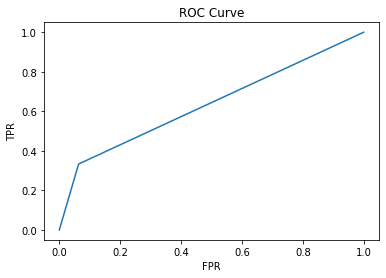

In [47]:
scores['Random Forest'] = check_model_perf(RandomForestClassifier(max_features=0.5, n_estimators = 600, oob_score = True), X_train, y_train, X_test, y_test)

<class 'sklearn.tree._classes.DecisionTreeClassifier'>
--------------------------------------------------
True Possitives  :	7
True Negatives   :	105
False Possitives :	21
False Negatives  :	17
AUC Score : 0.5625000000000001
Accuracy score: 0.7466666666666667
              precision    recall  f1-score   support

           0       0.86      0.83      0.85       126
           1       0.25      0.29      0.27        24

    accuracy                           0.75       150
   macro avg       0.56      0.56      0.56       150
weighted avg       0.76      0.75      0.75       150



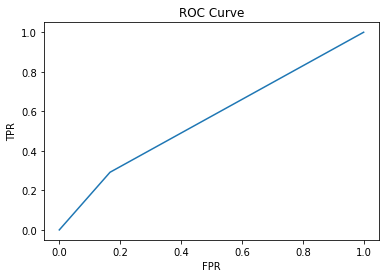

In [38]:
scores['Decision Tree'] = check_model_perf(DecisionTreeClassifier(criterion='gini', max_features = 'auto', splitter='best'), X_train, y_train, X_test, y_test)

<class 'sklearn.ensemble._weight_boosting.AdaBoostClassifier'>
--------------------------------------------------
True Possitives  :	15
True Negatives   :	112
False Possitives :	14
False Negatives  :	9
AUC Score : 0.7569444444444444
Accuracy score: 0.8466666666666667
              precision    recall  f1-score   support

           0       0.93      0.89      0.91       126
           1       0.52      0.62      0.57        24

    accuracy                           0.85       150
   macro avg       0.72      0.76      0.74       150
weighted avg       0.86      0.85      0.85       150



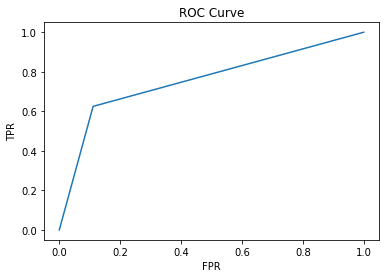

In [39]:
scores['AdaBoost'] = check_model_perf(AdaBoostClassifier(n_estimators = 100, learning_rate=0.9), X_train, y_train, X_test, y_test)

In [40]:
pd.DataFrame.from_dict(scores, orient='index', columns=['AUC Score']).sort_values(by=['AUC Score'], ascending=False)

,AUC Score
AdaBoost,0.756944
Random Forest,0.629960
Decision Tree,0.562500


### Models_for_submission

In [42]:
!mkdir models

mkdir: models: File exists


RandomForest

In [48]:
model = RandomForestClassifier(max_features=0.6, n_estimators = 600, oob_score = True)
model.fit(X_train, y_train)
pkl_filename = "models/RandomForest.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(model, file)

In [49]:
model = DecisionTreeClassifier(criterion='gini', max_features = 'auto', splitter='best')
model.fit(X_train, y_train)
pkl_filename = "models/DecisionTree.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(model, file)

In [50]:
model = AdaBoostClassifier(n_estimators = 100, learning_rate=0.9)
model.fit(X_train, y_train)
pkl_filename = "models/Adaboost.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(model, file)